In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pandas_profiling as ppf

In [2]:
dataset = pd.read_csv('CardioGoodFitness.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Understand the structure if Data:

Examine the first 5rows of data

In [3]:
dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Examine last 5rows of the data

In [4]:
dataset.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


Check size of data

In [5]:
dataset.shape

(180, 9)

Check the data types of data in dataframe

In [6]:
dataset.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Check additional information on dataframe

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Identify the column names in dataset

In [8]:
dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Backup data before manipulation

In [9]:
dataset_back = dataset
dataset_back

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


Identify the missing values of dataset

In [10]:
dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Identify duplicate records

In [11]:
dataset.duplicated().sum()

0

Describe thenumerical columns in the dataset

In [12]:
dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Describe all the columns of dataset

In [13]:
dataset.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Count based on model

In [15]:
dataset.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Count based on Gender

In [16]:
dataset.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Count based on marital status

In [17]:
dataset.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Understand data for Product Code TM195

In [18]:
dataset[dataset['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


Understand data for Product Code TM498

In [19]:
dataset[dataset['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


Understand data for Product code TM798

In [20]:
dataset[dataset['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


Univeriate Analysis:

Analysis Based on Age

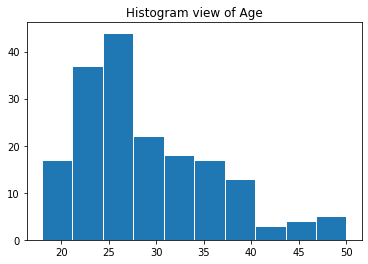

In [21]:
plt.hist(dataset.Age, edgecolor = 'white')
plt.title('Histogram view of Age')
plt.show()

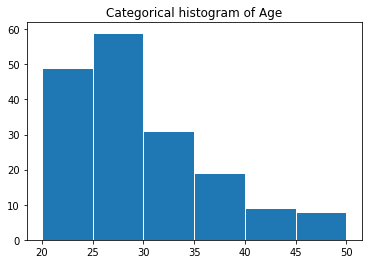

In [22]:
bins = [20,25,30,35,40,45,50]
plt.hist(dataset.Age, bins, edgecolor = 'white')
plt.title('Categorical histogram of Age')
plt.show()

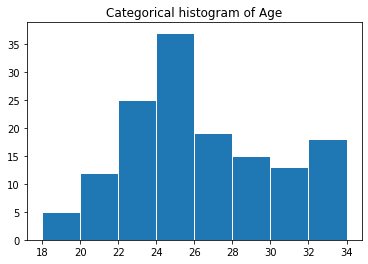

In [23]:
bins = [18,20,22,24,26,28,30,32,34]
plt.hist(dataset.Age, bins, edgecolor = 'white')
plt.title('Categorical histogram of Age')
plt.show()

Analysis based on Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


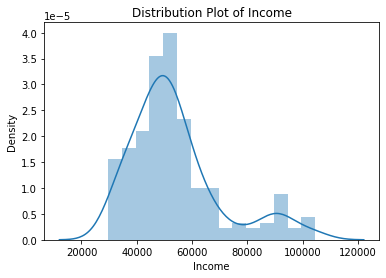

In [24]:
sns.distplot(dataset.Income)
plt.title('Distribution Plot of Income')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


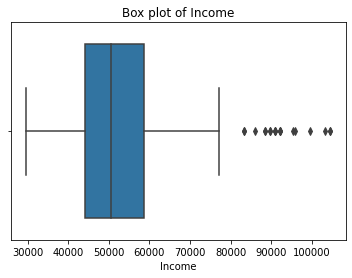

In [25]:
sns.boxplot(dataset.Income)
plt.title('Box plot of Income')
plt.show()

Analysis Based on Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


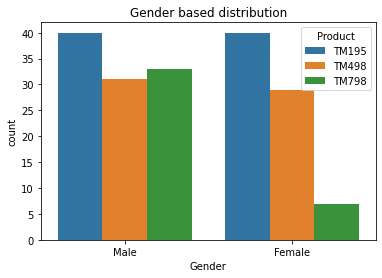

In [26]:
sns.countplot(dataset.Gender, hue=dataset.Product)
plt.title('Gender based distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


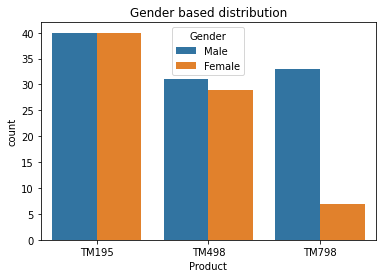

In [27]:
sns.countplot(dataset.Product, hue=dataset.Gender)
plt.title('Gender based distribution')
plt.show()

Analysis based on Marital Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


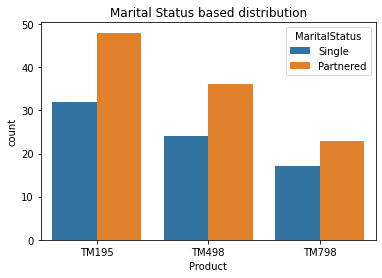

In [28]:
sns.countplot(dataset.Product, hue=dataset.MaritalStatus)
plt.title('Marital Status based distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


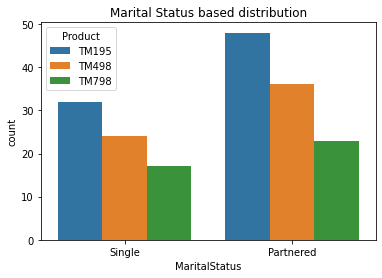

In [29]:
sns.countplot(dataset.MaritalStatus, hue=dataset.Product)
plt.title('Marital Status based distribution')
plt.show()

Analysis Based on Usage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


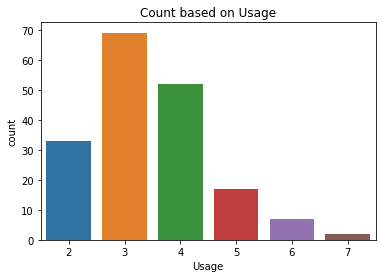

In [30]:
sns.countplot(dataset.Usage)
plt.title('Count based on Usage')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


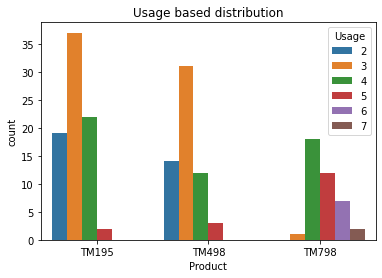

In [31]:
sns.countplot(dataset.Product, hue=dataset.Usage)
plt.title('Usage based distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


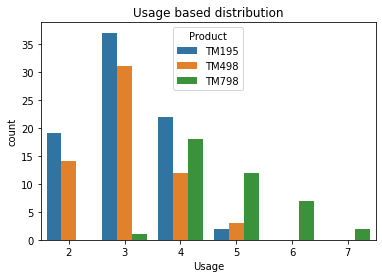

In [32]:
sns.countplot(dataset.Usage, hue=dataset.Product)
plt.title('Usage based distribution')
plt.show()

Analysis Based on Fitness level

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


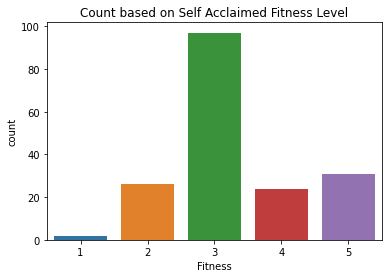

In [33]:
sns.countplot(dataset.Fitness)
plt.title('Count based on Self Acclaimed Fitness Level')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


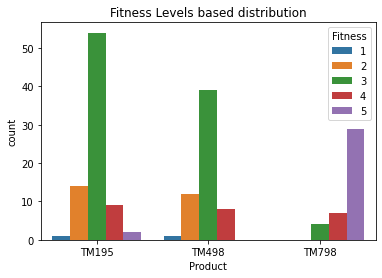

In [34]:
sns.countplot(dataset.Product, hue=dataset.Fitness)
plt.title('Fitness Levels based distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


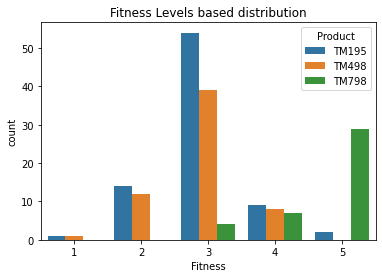

In [35]:
sns.countplot(dataset.Fitness, hue=dataset.Product)
plt.title('Fitness Levels based distribution')
plt.show()

Analysis Based on Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


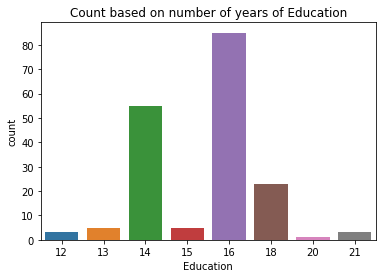

In [36]:
sns.countplot(dataset.Education)
plt.title('Count based on number of years of Education')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


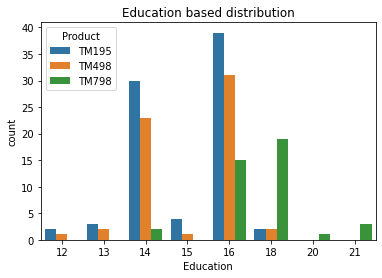

In [37]:
sns.countplot(dataset.Education, hue=dataset.Product)
plt.title('Education based distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


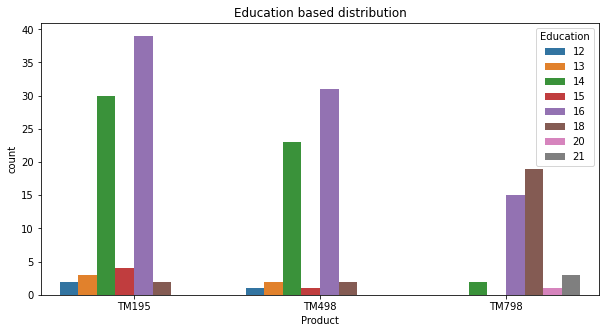

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(dataset.Product, hue=dataset.Education)
plt.title('Education based distribution')
plt.show()

Analysis Based On Miles planned per week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


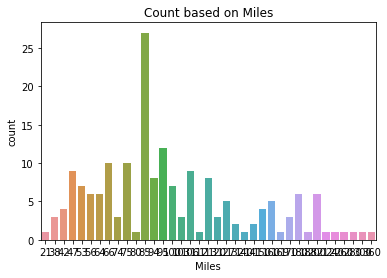

In [39]:
sns.countplot(dataset.Miles)
plt.title('Count based on Miles')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


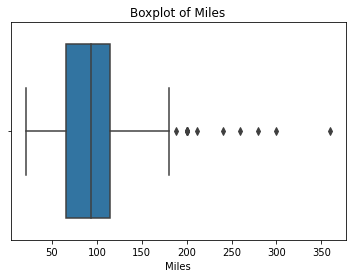

In [40]:
sns.boxplot(dataset.Miles)
plt.title('Boxplot of Miles')
plt.show()

In [41]:
dataset[dataset['Miles']>180]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


Bivariate Analysis

Average age for each model

In [42]:
dataset.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

Average Income for each model

In [43]:
dataset.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

Average miles per Model

In [44]:
dataset.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

Average of number of years of Education for each model

In [45]:
dataset.groupby('Product')['Education'].mean()

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

Analysis of Miles based on Age

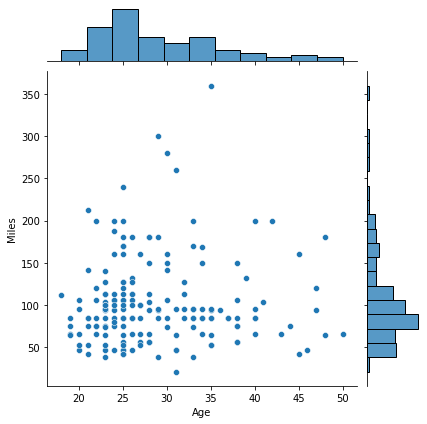

In [46]:
sns.jointplot(x='Age',y='Miles',data=dataset)
plt.show()

Analysis of Income based on Age

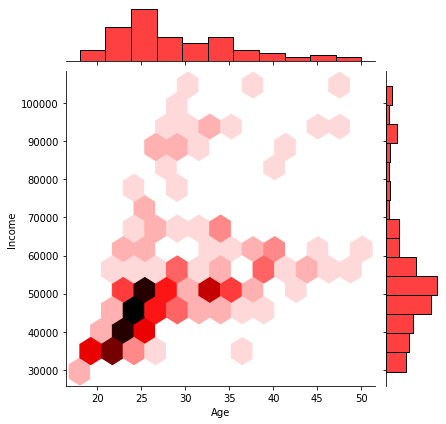

In [47]:
sns.jointplot(x='Age',y='Income',data=dataset, color='red', kind='hex')
plt.show()

Analysis of Miles based on Income

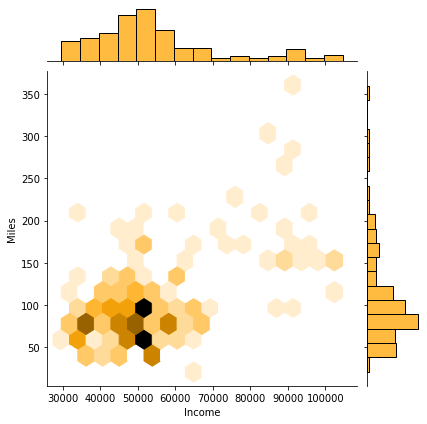

In [48]:
sns.jointplot(x='Income',y='Miles',data=dataset, color='orange', kind='hex')
plt.show()

Analysis of Income based on Gender

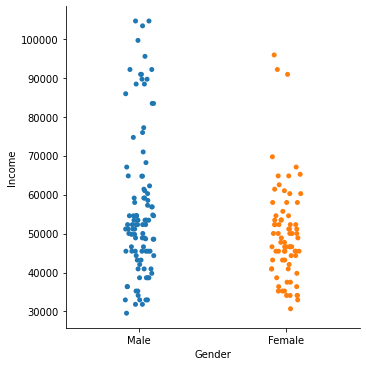

In [49]:
sns.catplot(x='Gender',y='Income',data=dataset)
plt.show()

Analysis of Miles based on Gender

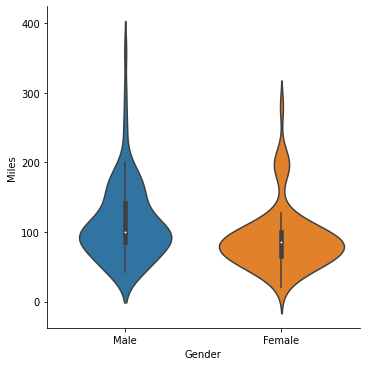

In [50]:
sns.catplot(x='Gender',y='Miles',data=dataset, kind='violin')
plt.show()

Analysis of Usage based on Gender

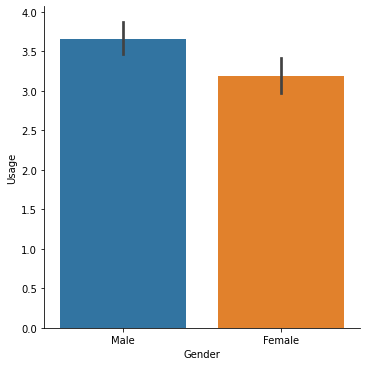

In [51]:
sns.catplot(x='Gender',y='Usage',data=dataset, kind='bar')
plt.show()

Analysis of Income based on Marital Status

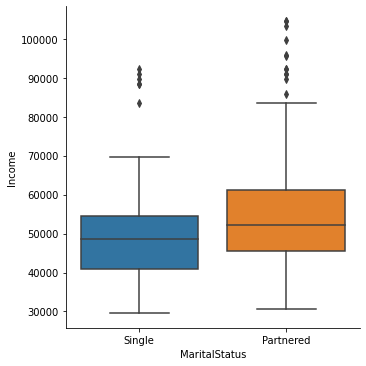

In [52]:
sns.catplot(x='MaritalStatus',y='Income',data=dataset, kind='box')
plt.show()

Analysis of Miles based on Marital Status

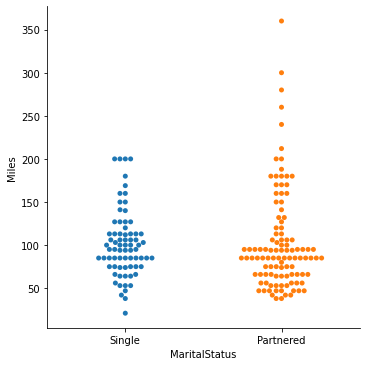

In [53]:
sns.catplot(x='MaritalStatus',y='Miles',data=dataset, kind='swarm')
plt.show()

Multivariate Analysis

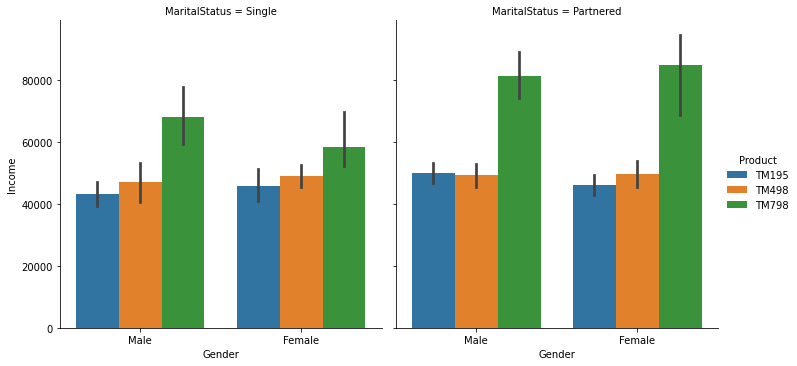

In [54]:
sns.catplot(x='Gender',y='Income', hue='Product',col='MaritalStatus',data=dataset, kind='bar')
plt.show()

Pointplot showing sales based on Education & Income

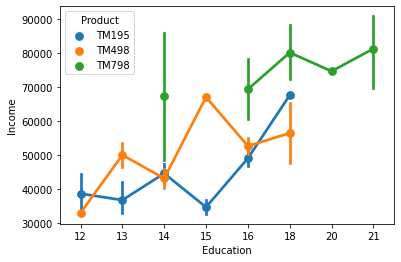

In [55]:
sns.pointplot(x=dataset['Education'],y=dataset['Income'],hue=dataset['Product'])
plt.show()

Correlation between Numerical columns of dataset

In [56]:
dataset.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


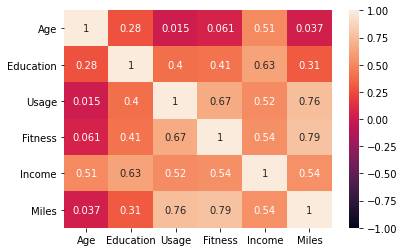

In [57]:
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Pairplot of all numerical values with classification of Product

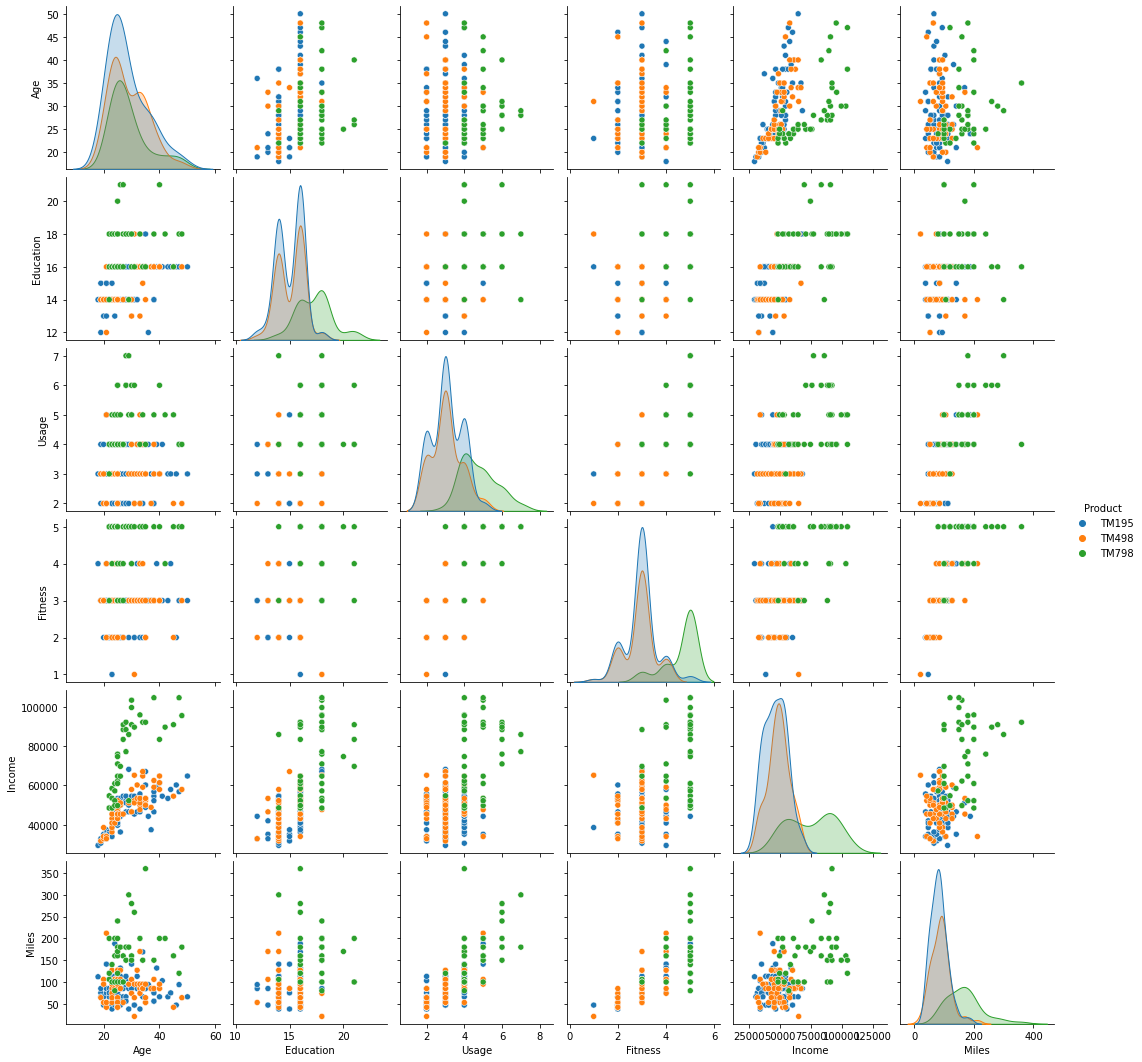

In [59]:
sns.pairplot(dataset, hue='Product')
plt.show()

Pairplot of all numericals values using KDE

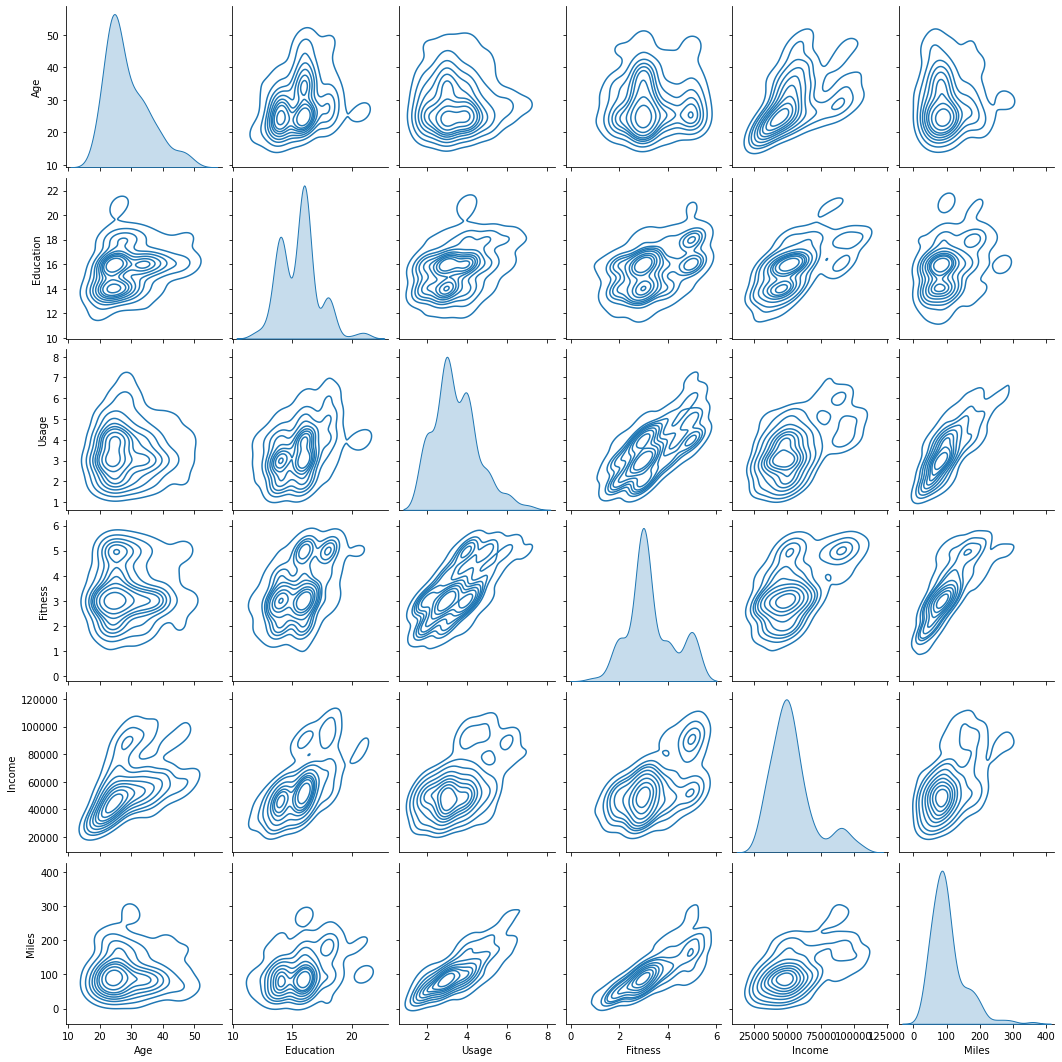

In [60]:
sns.pairplot(dataset, kind='kde')
plt.show()